In [24]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from metricas import MSE 
from modelo import RegresionLineal,RegLineConTermInd

# Cargo dataset de diabetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Uso solo una feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
muestras = len(diabetes_X)
cant_particiones = 5
porcentaje_split = 0.8
# Permuto los datos y armo 5 grupos con los datos

idx = np.random.permutation(muestras)
diabetes_X = diabetes_X[idx]
diabetes_y = diabetes_y[idx]

listaX = np.array_split(diabetes_X,cant_particiones ,axis=0)
listaY = np.array_split(diabetes_y,cant_particiones)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Hago plot de cada grupo

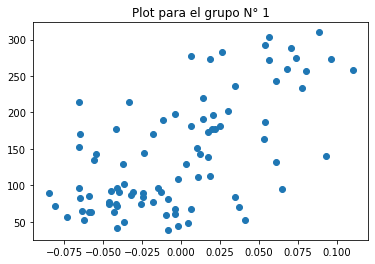

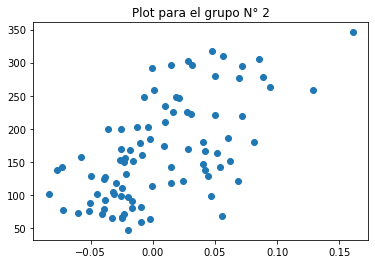

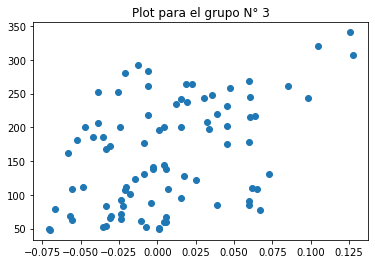

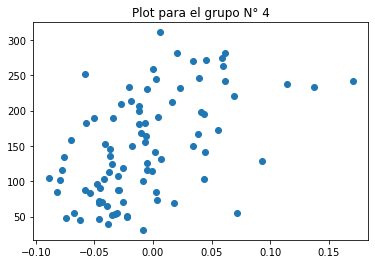

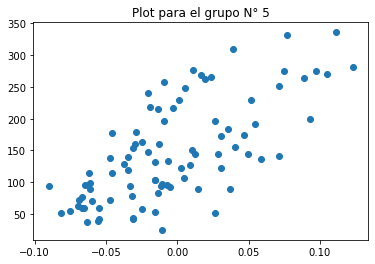

In [2]:
#plt.figure(figsize=(15,20))
for i in range(cant_particiones):
    
    # plt.subplot(i+1,1,i+1)
    # Plot de datos para 
    plt.title("Plot para el grupo N° {0}".format(i+1))
    plt.scatter(listaX[i], listaY[i])
    plt.show()

### Calculo regresión lineal con y sin termino indepdendiente y grafico cada grupo con sus rectas de regresión

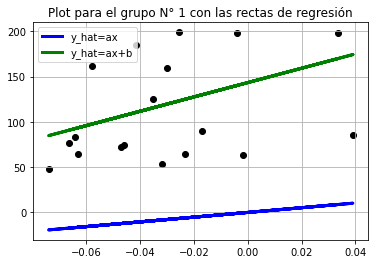

Datos de modelo grupo N° 1
Modelo lineal:  [260.7729205]
Modelo lineal con termino :  [791.35333293 143.43180865]





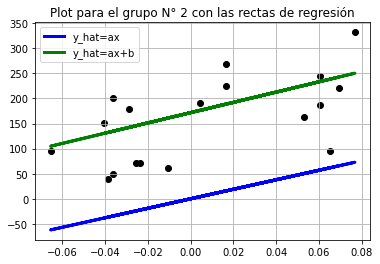

Datos de modelo grupo N° 2
Modelo lineal:  [948.22112529]
Modelo lineal con termino :  [1023.65218843  171.7507185 ]





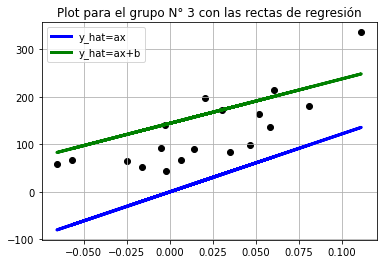

Datos de modelo grupo N° 3
Modelo lineal:  [1220.95636185]
Modelo lineal con termino :  [935.62161013 144.26154921]





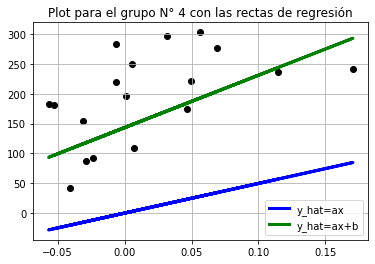

Datos de modelo grupo N° 4
Modelo lineal:  [496.6858293]
Modelo lineal con termino :  [877.63994935 143.26051262]





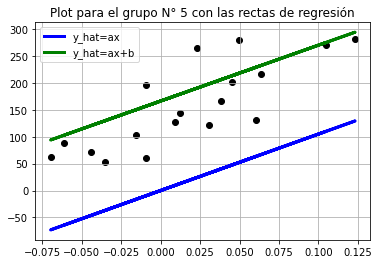

Datos de modelo grupo N° 5
Modelo lineal:  [1049.45947693]
Modelo lineal con termino :  [1038.33608141  166.36786178]





In [29]:
Lista_Train_X =[]
Lista_Test_X =[]
Lista_Train_Y =[]
Lista_Test_Y =[]
Lista_y_prediccion_lin = []
Lista_y_prediccion_lin_ind = []


for i in range(cant_particiones):
    
    # Permuto los datos en 
    trainX_set,testX_set = np.split(listaX[i],[int(porcentaje_split*len(listaX[i]))])  
    trainY_set,testY_set = np.split(listaY[i],[int(porcentaje_split*len(listaY[i]))])  
    reg_lin = RegresionLineal()
    reg_lin.fit(trainX_set,trainY_set)
    y_prediccion_lin = reg_lin.predict(testX_set)

    reg_lin_ind = RegLineConTermInd()
    reg_lin_ind.fit(trainX_set,trainY_set)
    y_prediccion_lin_ind = reg_lin_ind.predict(testX_set)
    
    #Guardo los valores calculados para cada particion para calculos posteriores
    Lista_Train_X.append(trainX_set)
    Lista_Test_X.append(testX_set)
    Lista_Train_Y.append(trainY_set)
    Lista_Test_Y.append(testY_set)
    Lista_y_prediccion_lin.append(y_prediccion_lin)
    Lista_y_prediccion_lin_ind.append(y_prediccion_lin_ind)

    # Plot outputs
    plt.title("Plot para el grupo N° {0} con las rectas de regresión".format(i+1))
    plt.scatter(testX_set, testY_set, color="black")
    plt.plot(testX_set, y_prediccion_lin, color="blue", linewidth=3, label='y_hat=ax')
    plt.plot(testX_set, y_prediccion_lin_ind, color="green", linewidth=3, label='y_hat=ax+b')
    plt.legend()
    plt.grid(True)
    
    plt.show()
    print("Datos de modelo grupo N° {0}".format(i+1))
    print("Modelo lineal: ",reg_lin._modelo)
    print("Modelo lineal con termino : ",reg_lin_ind._modelo)
    print("\n\n")

### Calculo error de cada grupo para la prediccion sin y con termino independiente

In [11]:
for i in range(cant_particiones):    
    
    mse_indice = MSE(truth=Lista_Test_Y[i],prediction=Lista_y_prediccion_lin[i])
    reg_lin_mse = mse_indice()
    mse_indice_ind = MSE(truth=Lista_Test_Y[i],prediction=Lista_y_prediccion_lin_ind[i])
    reg_lin_ind_mse = mse_indice_ind()
    print("El MSE sin termino independiente para la particion {0} es {1}".format(i+1,round(reg_lin_mse,4)))
    print("El MSE con termino independiente para la particion {0} es {1}\n".format(i+1,round(reg_lin_ind_mse,4)))


El MSE sin termino independiente para la particion 1 es 19355.9295
El MSE con termino independiente para la particion 1 es 2491.5838

El MSE sin termino independiente para la particion 2 es 30279.1503
El MSE con termino independiente para la particion 2 es 3418.6563

El MSE sin termino independiente para la particion 3 es 29275.9176
El MSE con termino independiente para la particion 3 es 2840.6059

El MSE sin termino independiente para la particion 4 es 35652.1832
El MSE con termino independiente para la particion 4 es 5696.1122

El MSE sin termino independiente para la particion 5 es 27540.2002
El MSE con termino independiente para la particion 5 es 3047.7857



### Calculo $R^{2}$ para cada particion

In [12]:
def r_squared_lr(X, y, y_hat):
    n = y.size
    var_media = np.sum((y - np.mean(y)) ** 2) / n
    var_fit = np.sum((y - y_hat) ** 2) / n
    return (var_media - var_fit)/var_media

In [13]:
for i in range(cant_particiones):    
    r2_reg_lin = r_squared_lr(Lista_Test_X[i],Lista_Test_Y[i],Lista_y_prediccion_lin[i])
    r2_reg_lin_ind = r_squared_lr(Lista_Test_X[i],Lista_Test_Y[i],Lista_y_prediccion_lin_ind[i])
  
    print("El R2 sin termino independiente para la particion {0} es {1}".format(i+1,round(r2_reg_lin,4)))
    print("El R2 con termino independiente para la particion {0} es {1}\n".format(i+1,round(r2_reg_lin_ind,4)))

El R2 sin termino independiente para la particion 1 es -4.715
El R2 con termino independiente para la particion 1 es 0.2643

El R2 sin termino independiente para la particion 2 es -3.228
El R2 con termino independiente para la particion 2 es 0.5226

El R2 sin termino independiente para la particion 3 es -6.0864
El R2 con termino independiente para la particion 3 es 0.3124

El R2 sin termino independiente para la particion 4 es -5.2466
El R2 con termino independiente para la particion 4 es 0.002

El R2 sin termino independiente para la particion 5 es -5.5283
El R2 con termino independiente para la particion 5 es 0.2775



Puede verse claramente que sin termino independiente el R2 da muy mal para todos los casos, como podiamos inferir de los graficos anteriores. En general da valores de R2 bastante razonables, salvo para la particion 4 que se aproxima mucho a 0

### Graficamos el Error Cuadrático Medio

In [19]:
def ECM_graph(X,y,w):
    ecm=0.0
    for n,val in enumerate(y):
        y_est = w[0] + w[1]*X[n]
        ecm = ecm + (y_est - y[n])**2
    return ecm/len(y)

In [20]:
from matplotlib import cm

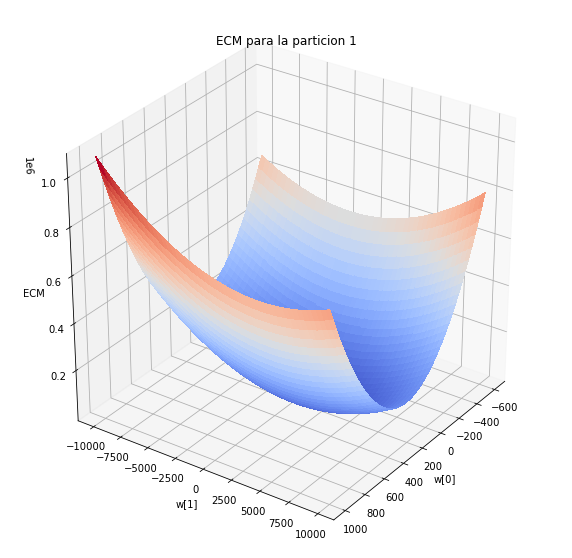

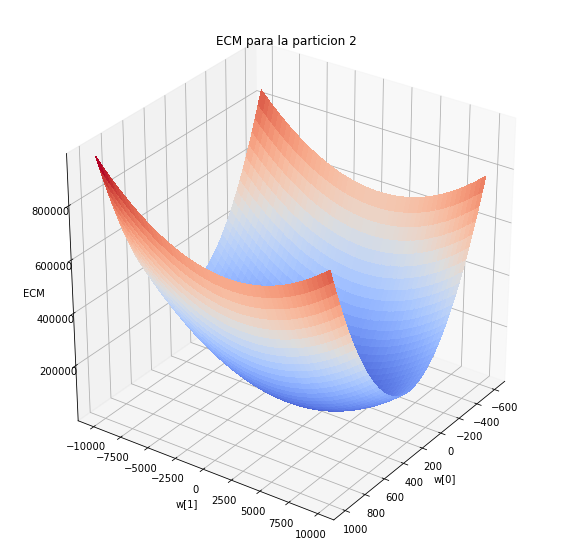

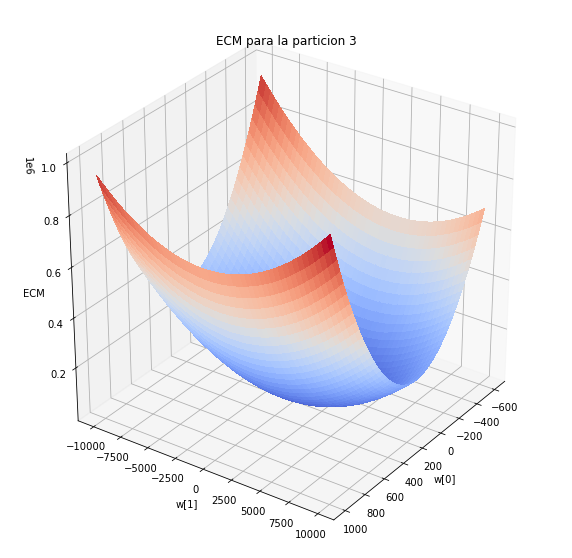

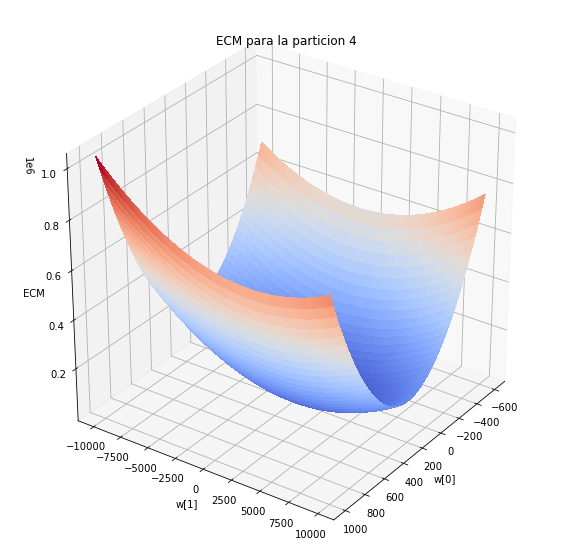

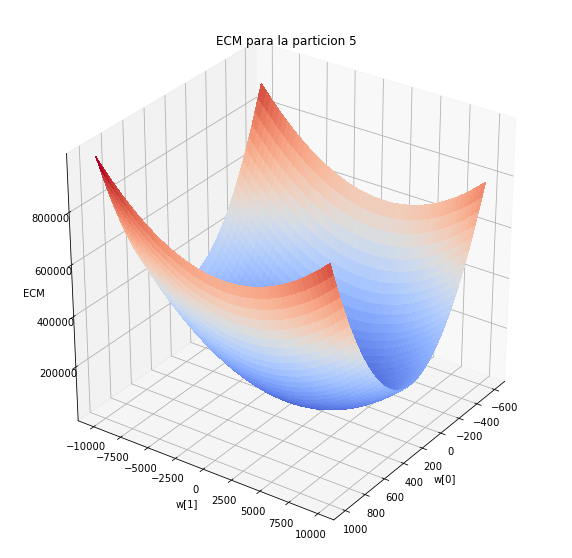

In [45]:
for i in range(cant_particiones):    
    # generadmos grilla de puntos    
    w0 = np.arange(-600,1000,2)
    w1 = np.arange(-10000,10000,100)
    X0, Y0 = np.meshgrid(w0, w1)
    
    # Calculamos el ECM para todos los posibles valores de w del rango elegido
    Z = ECM_graph(Lista_Train_X[i],Lista_Train_Y[i],[X0,Y0])

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
    surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    titulo = "ECM para la particion "+str(i+1)
    ax.set_zlabel('ECM')
    ax.set_xlabel('w[0]')
    ax.set_ylabel('w[1]')
    plt.title(titulo)
    ax.view_init(30, 35)   
    

    

In [46]:
from mpl_toolkits import mplot3d

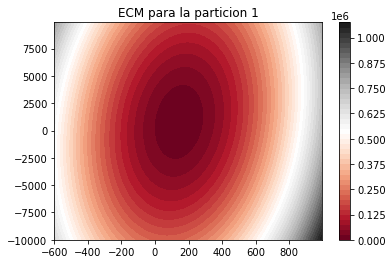

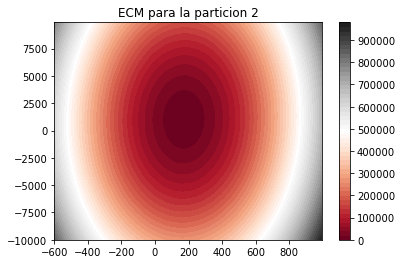

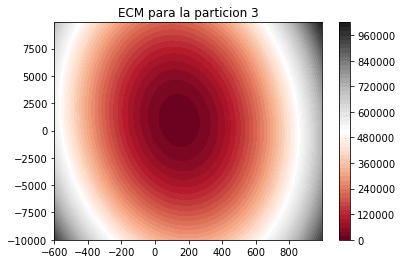

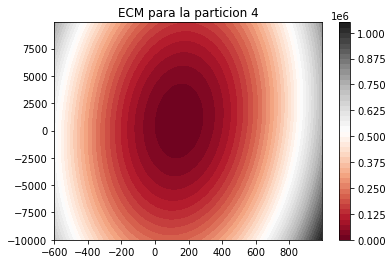

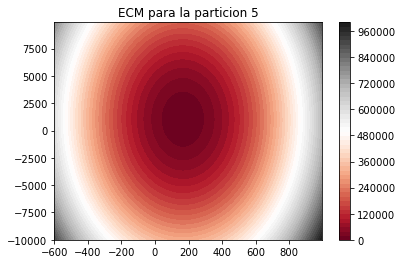

In [49]:
for i in range(cant_particiones):    
    # generadmos grilla de puntos    
    w0 = np.arange(-600,1000,2)
    w1 = np.arange(-10000,10000,100)
    X0, Y0 = np.meshgrid(w0, w1)
    
    # Calculamos el ECM para todos los posibles valores de w del rango elegido
    Z = ECM_graph(Lista_Train_X[i],Lista_Train_Y[i],[X0,Y0])
    plt.contourf(X0, Y0, Z, 50, cmap='RdGy')
    plt.colorbar()
    titulo = "ECM para la particion "+str(i+1)
    plt.title(titulo)
    plt.show()

In [55]:
a = np.array([[1,2],[3,4]])
b = np.array([[1,2],[3,4]])
c = np.array([[1,2],[3,4]])
d= np.array([a,b,c])
np.sum(d,axis=2)

array([[3, 7],
       [3, 7],
       [3, 7]])